## EECE5644 Assignment 2 - Question 5

#### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.stats import dirichlet
import seaborn as sns

### Numerical Validation and Visualization

#### Generate synthetic data from categorical distribution

In [8]:
# True parameters
K = 4
theta_true = np.array([0.1, 0.3, 0.4, 0.2])
N_samples = 1000

# Generate samples
np.random.seed(42)
samples = np.random.choice(K, size=N_samples, p=theta_true)

# Count occurrences
N_k = np.array([np.sum(samples == k) for k in range(K)])

print(f"True parameters: {theta_true}")
print(f"Counts N_k: {N_k}")
print(f"Total samples N: {N_samples}")

True parameters: [0.1 0.3 0.4 0.2]
Counts N_k: [108 313 380 199]
Total samples N: 1000


#### Compute ML estimator

In [9]:
theta_ML = N_k / N_samples

print("ML Estimator:")
print(f"θ̂_ML = {theta_ML}")
print(f"Error from true: {np.linalg.norm(theta_ML - theta_true):.4f}")

ML Estimator:
θ̂_ML = [0.108 0.313 0.38  0.199]
Error from true: 0.0252


#### Compute MAP estimators with different priors

In [10]:
# Test different Dirichlet priors
alpha_values = [
    np.ones(K),           # Uniform prior (α_k = 1)
    np.ones(K) * 2,       # Weak informative prior (α_k = 2)
    np.ones(K) * 5,       # Moderate prior (α_k = 5)
    np.array([2, 6, 8, 4]) # Informative prior
]

print("MAP Estimators with different priors:\n")
theta_MAP_list = []

for i, alpha in enumerate(alpha_values):
    theta_MAP = (N_k + alpha - 1) / (N_samples + np.sum(alpha) - K)
    theta_MAP_list.append(theta_MAP)
    
    print(f"Prior {i+1}: α = {alpha}")
    print(f"  θ̂_MAP = {theta_MAP}")
    print(f"  Error from true: {np.linalg.norm(theta_MAP - theta_true):.4f}")
    print()

MAP Estimators with different priors:

Prior 1: α = [1. 1. 1. 1.]
  θ̂_MAP = [0.108 0.313 0.38  0.199]
  Error from true: 0.0252

Prior 2: α = [2. 2. 2. 2.]
  θ̂_MAP = [0.10856574 0.312749   0.37948207 0.19920319]
  Error from true: 0.0256

Prior 3: α = [5. 5. 5. 5.]
  θ̂_MAP = [0.11023622 0.31200787 0.37795276 0.19980315]
  Error from true: 0.0271

Prior 4: α = [2 6 8 4]
  θ̂_MAP = [0.10728346 0.31299213 0.38090551 0.1988189 ]
  Error from true: 0.0242



#### Visualize estimates comparison

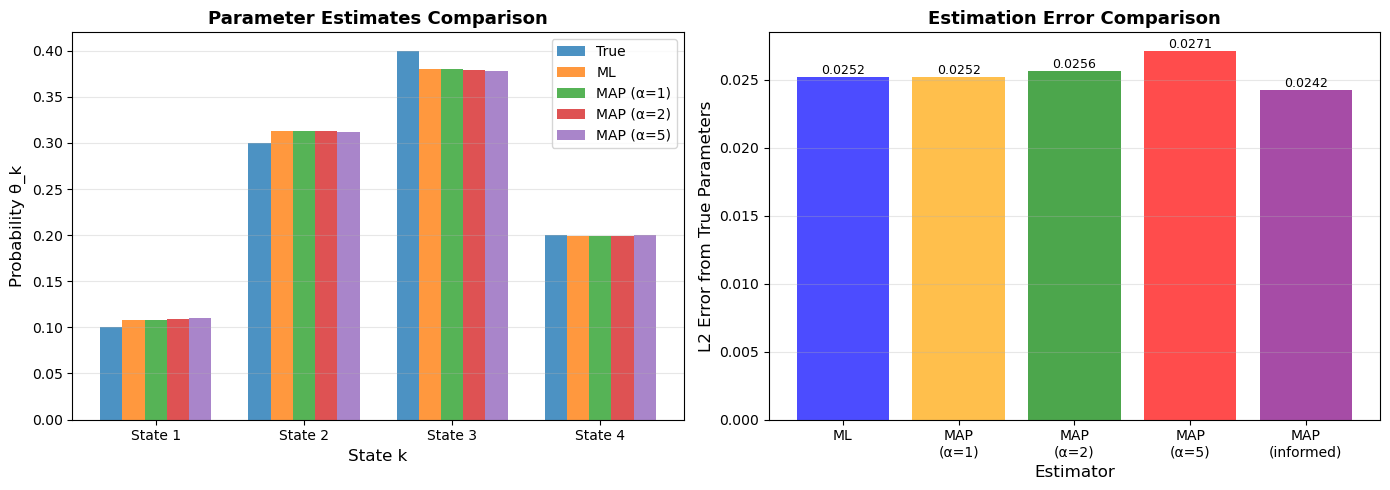

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot comparing estimates
x = np.arange(K)
width = 0.15

ax = axes[0]
ax.bar(x - 2*width, theta_true, width, label='True', alpha=0.8)
ax.bar(x - width, theta_ML, width, label='ML', alpha=0.8)
ax.bar(x, theta_MAP_list[0], width, label='MAP (α=1)', alpha=0.8)
ax.bar(x + width, theta_MAP_list[1], width, label='MAP (α=2)', alpha=0.8)
ax.bar(x + 2*width, theta_MAP_list[2], width, label='MAP (α=5)', alpha=0.8)

ax.set_xlabel('State k', fontsize=12)
ax.set_ylabel('Probability θ_k', fontsize=12)
ax.set_title('Parameter Estimates Comparison', fontsize=13, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels([f'State {k+1}' for k in range(K)])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# Error comparison
ax = axes[1]
errors = [np.linalg.norm(theta_ML - theta_true)] + \
         [np.linalg.norm(theta_MAP - theta_true) for theta_MAP in theta_MAP_list]
labels = ['ML', 'MAP\n(α=1)', 'MAP\n(α=2)', 'MAP\n(α=5)', 'MAP\n(informed)']

bars = ax.bar(range(len(errors)), errors, alpha=0.7, color=['blue', 'orange', 'green', 'red', 'purple'])
ax.set_xlabel('Estimator', fontsize=12)
ax.set_ylabel('L2 Error from True Parameters', fontsize=12)
ax.set_title('Estimation Error Comparison', fontsize=13, weight='bold')
ax.set_xticks(range(len(errors)))
ax.set_xticklabels(labels)
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, error in zip(bars, errors):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{error:.4f}',
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

#### Effect of sample size on estimates

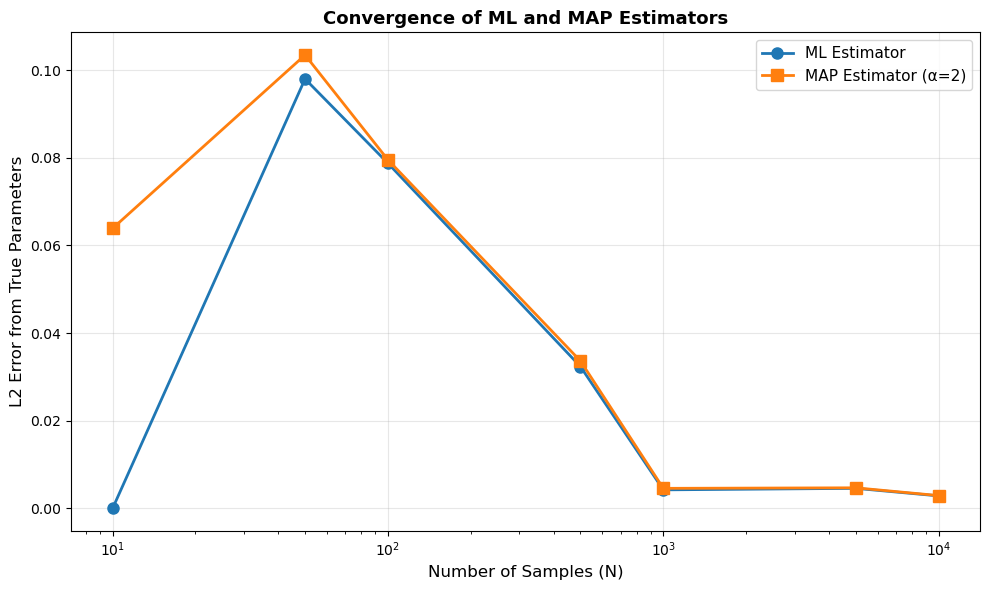

Convergence Analysis:
As N increases, both ML and MAP converge to true parameters.
MAP has lower error for small N due to prior regularization.
For large N, ML and MAP become nearly identical.


In [12]:
# Study convergence with increasing sample size
sample_sizes = [10, 50, 100, 500, 1000, 5000, 10000]
alpha = np.ones(K) * 2  # Weak prior

ml_errors = []
map_errors = []

np.random.seed(42)
for N in sample_sizes:
    samples = np.random.choice(K, size=N, p=theta_true)
    N_k = np.array([np.sum(samples == k) for k in range(K)])
    
    # ML estimate
    theta_ML = N_k / N
    ml_errors.append(np.linalg.norm(theta_ML - theta_true))
    
    # MAP estimate
    theta_MAP = (N_k + alpha - 1) / (N + np.sum(alpha) - K)
    map_errors.append(np.linalg.norm(theta_MAP - theta_true))

# Plot convergence
plt.figure(figsize=(10, 6))
plt.semilogx(sample_sizes, ml_errors, 'o-', linewidth=2, markersize=8, label='ML Estimator')
plt.semilogx(sample_sizes, map_errors, 's-', linewidth=2, markersize=8, label='MAP Estimator (α=2)')
plt.xlabel('Number of Samples (N)', fontsize=12)
plt.ylabel('L2 Error from True Parameters', fontsize=12)
plt.title('Convergence of ML and MAP Estimators', fontsize=13, weight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Convergence Analysis:")
print("As N increases, both ML and MAP converge to true parameters.")
print("MAP has lower error for small N due to prior regularization.")
print("For large N, ML and MAP become nearly identical.")

#### Visualize Dirichlet prior and posterior (for K=3)

In [13]:
# For visualization, use K=3 (can plot on simplex)
K_viz = 3
theta_true_3 = np.array([0.2, 0.5, 0.3])
N_samples_3 = 100

# Generate samples
np.random.seed(42)
samples_3 = np.random.choice(K_viz, size=N_samples_3, p=theta_true_3)
N_k_3 = np.array([np.sum(samples_3 == k) for k in range(K_viz)])

# Prior and posterior parameters
alpha_prior = np.array([2, 2, 2])
alpha_posterior = N_k_3 + alpha_prior

print(f"K=3 example for visualization:")
print(f"True: {theta_true_3}")
print(f"Counts: {N_k_3}")
print(f"Prior α: {alpha_prior}")
print(f"Posterior α: {alpha_posterior}")

# Sample from prior and posterior
prior_samples = dirichlet.rvs(alpha_prior, size=5000, random_state=42)
posterior_samples = dirichlet.rvs(alpha_posterior, size=5000, random_state=42)

# ML and MAP estimates
theta_ML_3 = N_k_3 / N_samples_3
theta_MAP_3 = (N_k_3 + alpha_prior - 1) / (N_samples_3 + np.sum(alpha_prior) - K_viz)

print(f"ML: {theta_ML_3}")
print(f"MAP: {theta_MAP_3}")

K=3 example for visualization:
True: [0.2 0.5 0.3]
Counts: [28 42 30]
Prior α: [2 2 2]
Posterior α: [30 44 32]
ML: [0.28 0.42 0.3 ]
MAP: [0.2815534  0.41747573 0.30097087]


#### Plot Dirichlet distributions on 2D simplex projection

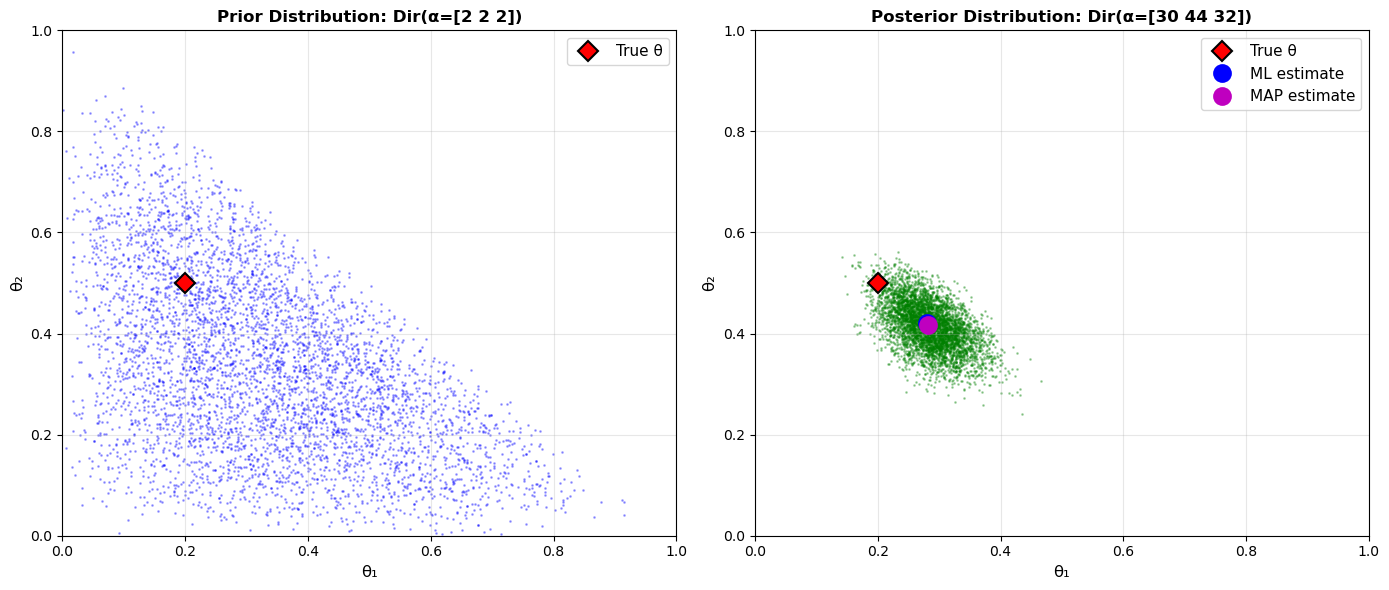


Visualization shows:
- Prior is diffuse (uniform-like for α=2)
- Posterior concentrates around true and estimated values
- MAP estimate is between prior mode and ML estimate


In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot prior
ax = axes[0]
ax.scatter(prior_samples[:, 0], prior_samples[:, 1], alpha=0.3, s=1, c='blue')
ax.plot(theta_true_3[0], theta_true_3[1], 'rD', markersize=10, label='True θ', markeredgecolor='black', markeredgewidth=1.5)
ax.set_xlabel('θ₁', fontsize=12)
ax.set_ylabel('θ₂', fontsize=12)
ax.set_title(f'Prior Distribution: Dir(α={alpha_prior})', fontsize=12, weight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Plot posterior
ax = axes[1]
ax.scatter(posterior_samples[:, 0], posterior_samples[:, 1], alpha=0.3, s=1, c='green')
ax.plot(theta_true_3[0], theta_true_3[1], 'rD', markersize=10, label='True θ', markeredgecolor='black', markeredgewidth=1.5)
ax.plot(theta_ML_3[0], theta_ML_3[1], 'bo', markersize=12, label='ML estimate', markeredgewidth=1.5)
ax.plot(theta_MAP_3[0], theta_MAP_3[1], 'mo', markersize=12, label='MAP estimate', markeredgewidth=1.5)
ax.set_xlabel('θ₁', fontsize=12)
ax.set_ylabel('θ₂', fontsize=12)
ax.set_title(f'Posterior Distribution: Dir(α={alpha_posterior})', fontsize=12, weight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

print("\nVisualization shows:")
print("- Prior is diffuse (uniform-like for α=2)")
print("- Posterior concentrates around true and estimated values")
print("- MAP estimate is between prior mode and ML estimate")